In [6]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl
import matplotlib.colors as pltc
import geopandas
import mapclassify
from shapely.geometry import Polygon, LineString, MultiPoint, Point
mpl.rcParams['pdf.fonttype'] = 42

In [3]:
df = pd.read_csv("../data/pnwNP_StatsLocations.csv")
df = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.dec_long_va,df.dec_lat_va)).set_crs('epsg:4269')

In [4]:
pnw_hydro = geopandas.read_file("../data/mapping/pnw_hydrologic_landscape_class/PNW Hydrologic Landscape Class.shp")
pnw_hydro_repro = pnw_hydro.to_crs(epsg=4269)
pnw_hydro_repro.CLASS = pnw_hydro['CLASS'].astype(str).str[0:1]

In [12]:
tt = geopandas.sjoin(df, pnw_hydro_repro, predicate='within')

In [43]:
key = {'W': 'wet',
          'V': 'very_wet' ,
          'D': 'dry',
          'M': 'moist',
          'S': 'semi_arid' ,
          'A': 'arid' ,
          'B': 'NA' }

tt["HydroLandClass"] = tt["CLASS"].map(key)

In [35]:
tt.to_csv("../data/pnwNP_StatsLocations_HydroClass.csv")

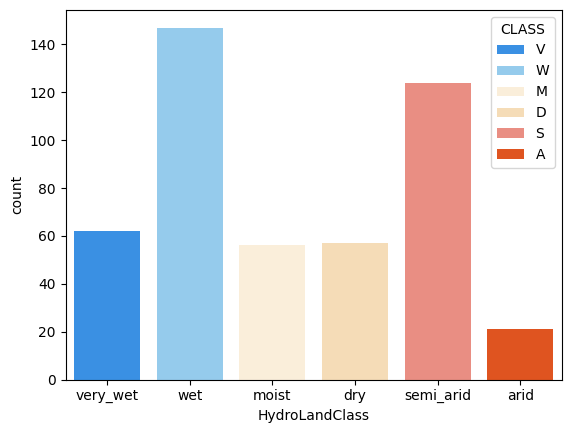

In [52]:
sort = {'V': '1' ,
        'W': '2',
        'M': '3',
        'D': '4',
        'S': '5' ,
        'A': '6'}

tt["sort"] = tt["CLASS"].map(sort)

tt = tt.sort_values(['sort']).reset_index(drop=True)

color_map = {'W': 'lightskyblue',
          'V': 'dodgerblue' ,
          'D': 'navajowhite',
          'M': 'papayawhip',
          'S': 'salmon' ,
          'A': 'orangered' ,
          'B': 'hotpink' }

ax = sns.countplot(x="HydroLandClass", data=tt,
                  hue= "CLASS", palette=color_map)